In [1]:
# DataFrame
import pandas as pd

# Seaborn
import seaborn as sns

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
#Importing Datasets
data = pd.read_csv('Datasets/cleaned_data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

## EDA of numerical Variables

In [3]:
# making a new dataset with only numerical data
numer_data = data.select_dtypes(include=['float64','int64'])
numer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_tracks      1605 non-null   float64
 1   duration_ms       1605 non-null   float64
 2   popularity        1605 non-null   float64
 3   danceability      1605 non-null   float64
 4   energy            1605 non-null   float64
 5   key               1605 non-null   float64
 6   loudness          1605 non-null   float64
 7   mode              1605 non-null   float64
 8   speechiness       1605 non-null   float64
 9   acousticness      1605 non-null   float64
 10  instrumentalness  1605 non-null   float64
 11  liveness          1605 non-null   float64
 12  valence           1605 non-null   float64
 13  tempo             1605 non-null   float64
 14  time_signature    1605 non-null   float64
dtypes: float64(15)
memory usage: 188.2 KB


,total_tracks,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
total_tracks,1.000000,-0.022836,0.022940,0.037927,0.013930,-0.013663,-0.013647,0.018018,-0.001129,0.013523,-0.053008,0.022333,0.077574,0.024692,0.020690
duration_ms,-0.022836,1.000000,0.004476,-0.248414,-0.074131,-0.020828,-0.155583,-0.037382,-0.041376,-0.030330,0.136716,0.019371,-0.309342,-0.008497,-0.040981
popularity,0.022940,0.004476,1.000000,0.156467,-0.050828,-0.033083,0.021396,-0.030087,-0.014874,-0.002501,-0.148194,-0.058887,0.104006,-0.047494,0.031986
danceability,0.037927,-0.248414,0.156467,1.000000,-0.129046,0.031639,-0.017381,-0.061106,0.082636,0.034413,-0.153753,-0.056109,0.500225,-0.234104,0.115596
energy,0.013930,-0.074131,-0.050828,-0.129046,1.000000,0.006612,0.745152,-0.078473,0.123512,-0.696163,0.025954,0.194671,0.250719,0.212920,0.130420
key,-0.013663,-0.020828,-0.033083,0.031639,0.006612,1.000000,-0.005627,-0.138554,0.006240,-0.007408,-0.010602,0.019794,0.067690,0.012814,-0.046405
loudness,-0.013647,-0.155583,0.021396,-0.017381,0.745152,-0.005627,1.000000,-0.029426,0.066358,-0.592424,-0.114172,0.108816,0.161391,0.144643,0.078796
mode,0.018018,-0.037382,-0.030087,-0.061106,-0.078473,-0.138554,-0.029426,1.000000,-0.110786,0.114623,-0.058045,-0.017584,-0.036222,-0.018330,-0.049588
speechiness,-0.001129,-0.041376,-0.014874,0.082636,0.123512,0.006240,0.066358,-0.110786,1.000000,-0.078073,-0.015361,0.162887,0.077105,0.024635,0.051501
acousticness,0.013523,-0.030330,-0.002501,0.034413,-0.696163,-0.007408,-0.592424,0.114623,-0.078073,1.000000,-0.028634,-0.110787,-0.141570,-0.169324,-0.092383


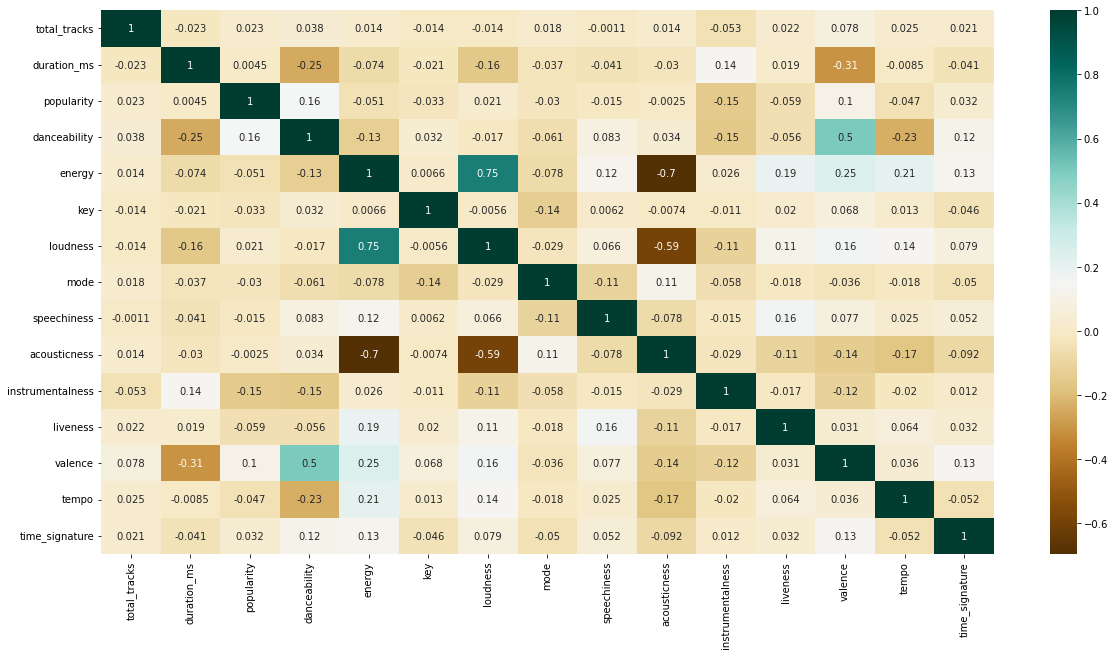

In [4]:
# Plotting the correlation between each variable
plt.figure(figsize=(20,10))
c = numer_data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [5]:
numer_data.describe()

,total_tracks,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,0.141804,0.117292,0.612166,0.522811,0.710476,0.474087,0.766772,0.664798,0.090123,0.154751,0.043990,0.177141,0.478315,0.458925,0.740187
std,0.069866,0.067968,0.205195,0.174784,0.200961,0.324292,0.140571,0.472208,0.125055,0.238977,0.152358,0.156125,0.246077,0.178949,0.060690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112360,0.078180,0.505376,0.399314,0.599000,0.181818,0.709646,0.000000,0.023772,0.004646,0.000000,0.079548,0.284072,0.319955,0.750000
50%,0.134831,0.105642,0.645161,0.522883,0.751068,0.454545,0.799425,1.000000,0.048434,0.043206,0.000012,0.115410,0.470109,0.450316,0.750000
75%,0.157303,0.140287,0.763441,0.646453,0.870847,0.727273,0.860821,1.000000,0.101311,0.184881,0.001822,0.233862,0.670778,0.576623,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

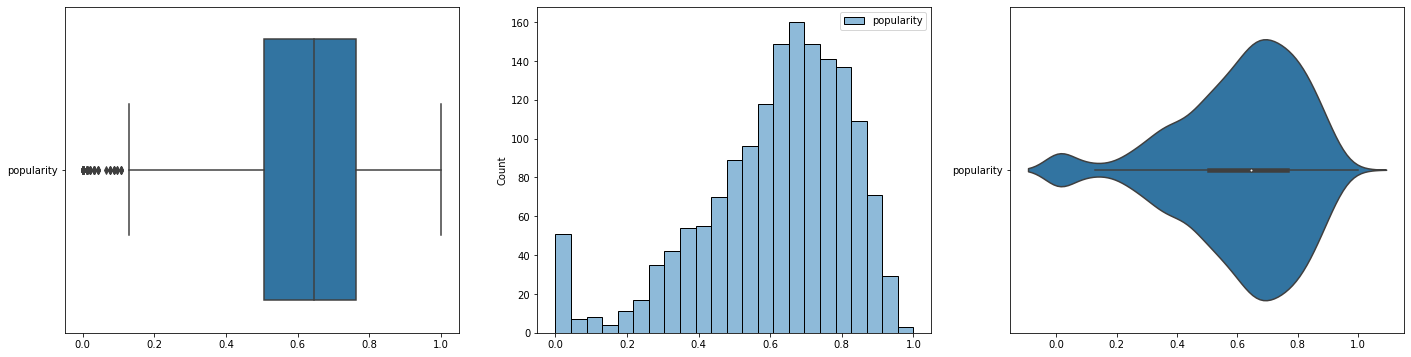

In [6]:
#Predictor variable "popularity"
f, axes = plt.subplots(1, 3, figsize=(24,6))

popularity = pd.DataFrame(numer_data["popularity"])
sns.boxplot(data = popularity, orient='h', ax = axes[0])
sns.histplot(data = popularity, ax = axes[1])
sns.violinplot(data = popularity, orient='h', ax = axes[2])

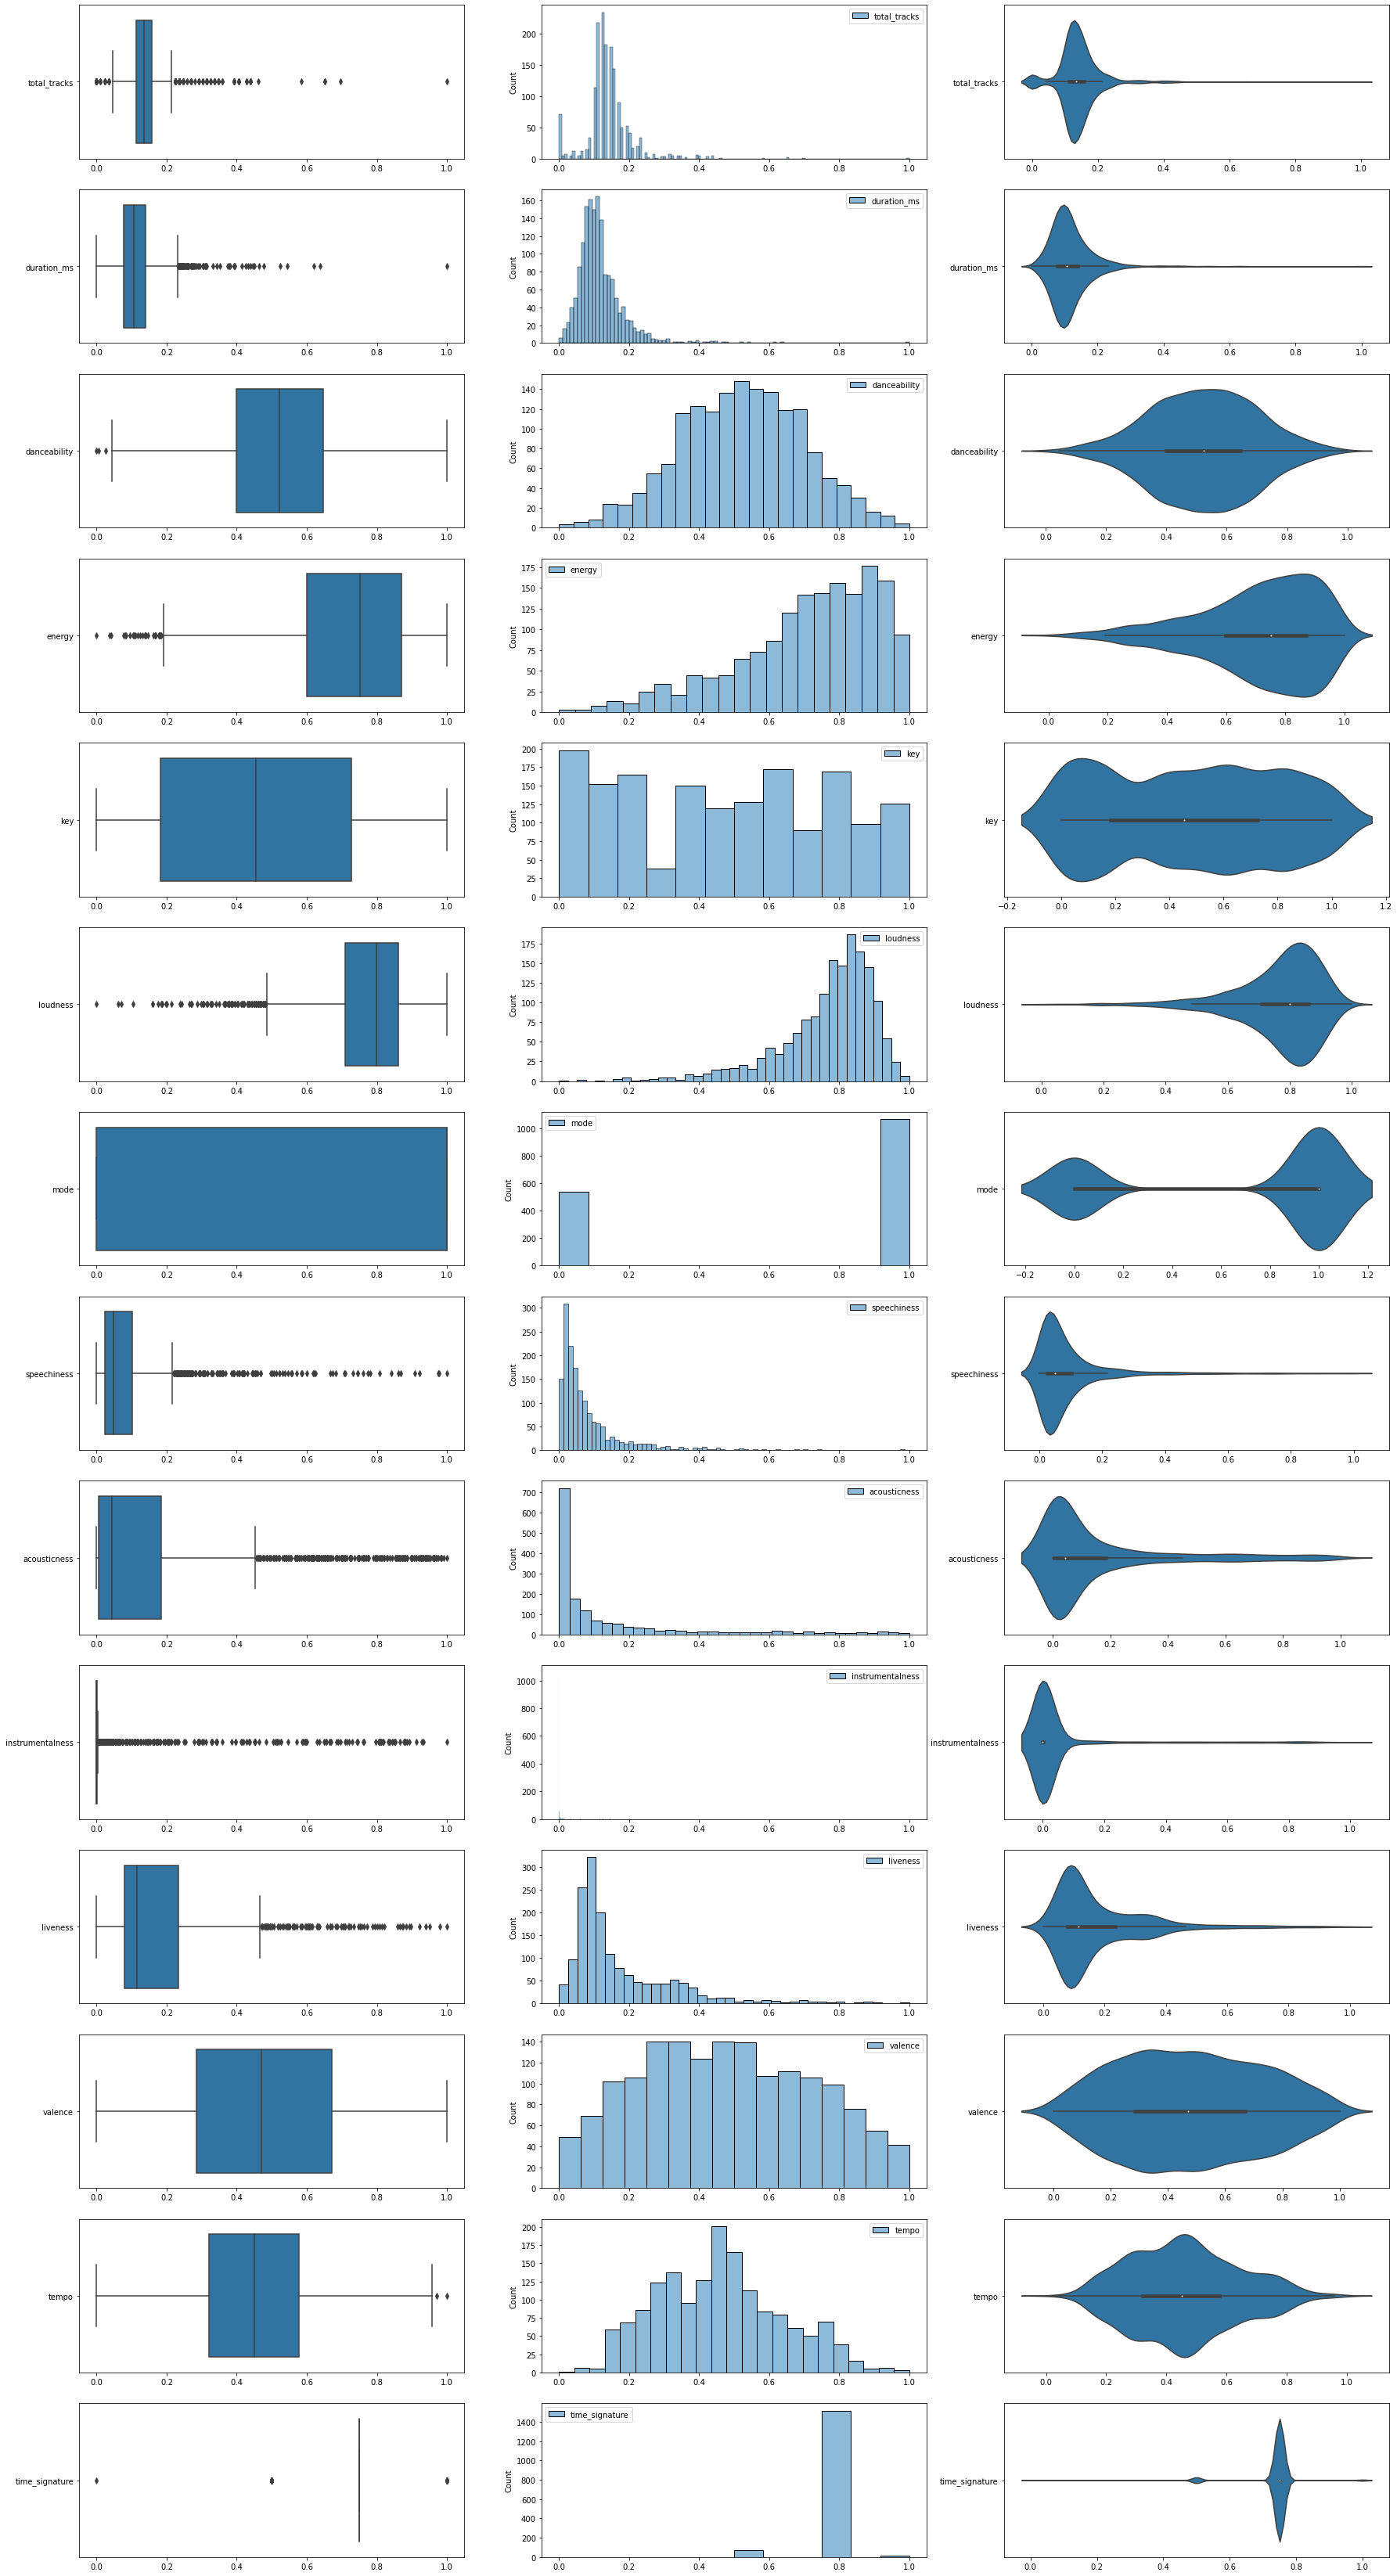

In [7]:
#Numerical response variables
f, axes = plt.subplots(14, 3, figsize=(30, 60))

count = 0
for var in numer_data:
    if var != "popularity": #exclude popularity
        df = pd.DataFrame(numer_data[var])
        sns.boxplot(data = df, orient='h', ax = axes[count,0])
        sns.histplot(data = df, ax = axes[count,1])
        sns.violinplot(data = df, orient='h', ax = axes[count,2])
        count += 1

## EDA of categorical variables

In [8]:
#making a new dataset with only categorical data
categ_data = data.select_dtypes(include=['object'])
categ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_name    1605 non-null   object
 1   release_date  1605 non-null   object
 2   artist_name   1605 non-null   object
 3   song_name     1605 non-null   object
 4   lyrics        1605 non-null   object
 5   language      1605 non-null   object
dtypes: object(6)
memory usage: 75.4+ KB


**'explicit' and 'language' seems to be categorical response variable**

In [9]:
#combining categ variables with popularity
new_data = data[["popularity", "explicit", "language"]]
new_data.head(5)

,popularity,explicit,language
0,0.870968,False,en
1,0.903226,False,en
2,0.935484,False,en
3,0.903226,False,en
4,0.591398,False,en


#### Explicit category EDA

unique values in explicit category: 
[False  True]

False    1474
True      131
Name: explicit, dtype: int64


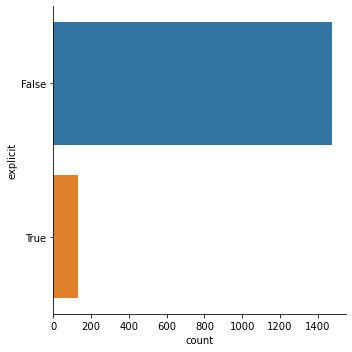

In [10]:
print("unique values in explicit category: ")
print(new_data["explicit"].unique()) # to print categories name only
print()
print(new_data["explicit"].value_counts()) # to print count of every category
sns.catplot(y = 'explicit', data = new_data, kind = "count")

<AxesSubplot:xlabel='popularity', ylabel='explicit'>

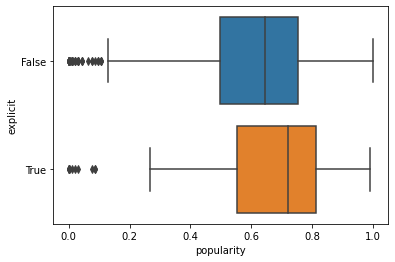

In [11]:
sns.boxplot(x = "popularity", y = "explicit", data = new_data, orient = "h")

<AxesSubplot:xlabel='popularity', ylabel='explicit'>

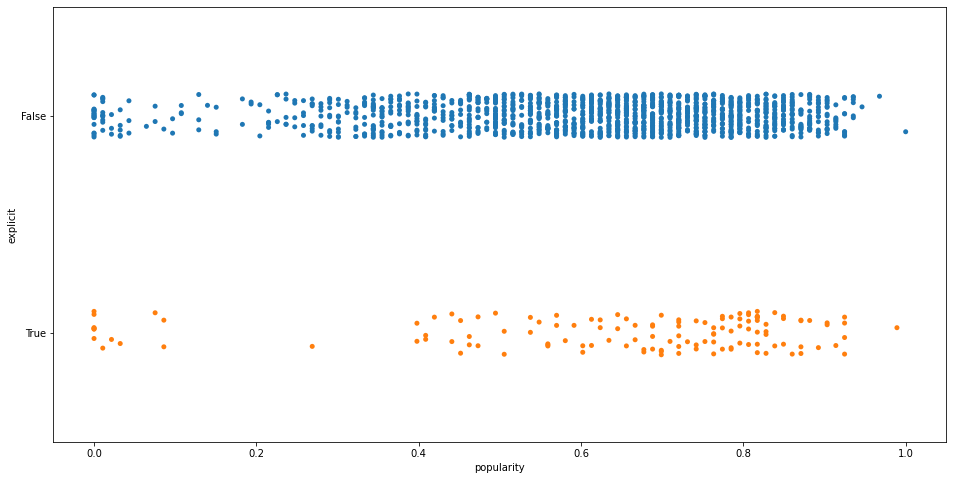

In [12]:
f = plt.figure(figsize=(16, 8))
sns.stripplot(x = 'popularity', y = 'explicit', data = new_data, orient = "h")

#### Language category EDA


unique values in language category: 
['en' 'pt' 'es' 'it' 'pl' 'de']

en    1595
es       5
it       2
pt       1
pl       1
de       1
Name: language, dtype: int64


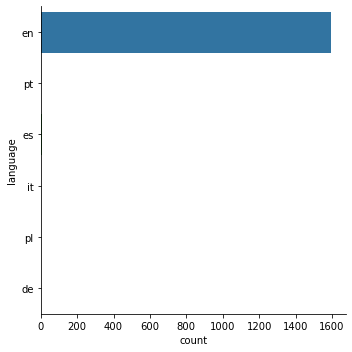

In [13]:
print("unique values in language category: ")
print(new_data["language"].unique()) # to print categories name only
print()
print(new_data["language"].value_counts()) # to print count of every category
sns.catplot(y = 'language', data = new_data, kind = "count")

<AxesSubplot:xlabel='popularity', ylabel='language'>

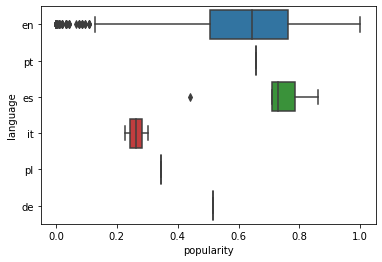

In [14]:
sns.boxplot(x = "popularity", y = "language", data = new_data, orient = "h")